# INF8111 - Fouille de données


## TP1 AUTOMNE 2025 - Préparation de données




### Instructions de remise

#### Membres de l'équipe :
    - Alexis Hirab 2146972 1
    - Nom (Matricule) 2
    - Nom (Matricule) 3

#### Numéro du groupe :
    - TP - Groupe #
    
#### Livrable :

Vous devez soumettre ce notebook sur Moodle dans la boite de remise sous le nom TP1_NumeroGroupe_matricule1_matricule2_matricule3.ipynb .

**NB**: Tout travail en retard sera pénalisé d'une valeur de 10\% par jour de retard.


## Introduction et objectifs

### Importation des différents modules

In [97]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install shap


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [98]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import linear_model
import shap

### Lecture des données

In [99]:
df = pd.read_csv('data.csv')

Le but de ce notebook est d'effectuer le prétraitement du dataset [HousePricePrediction](https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/edit#gid=1150341366) qui pourra être par la suite être utilisé pour entraîner un modèle de prédiction de prix de maisons.

## Préparation des données

Plusieurs étapes sont nécessaires pour préparer un dataset pour la fouille des données
- **Nettoyage des données** :
    - Suppression des attributs inutiles
    - Gestion des valeurs manquantes
    - Gestion des valeurs aberrantes
- **Transformation des données** :
    - Encodage des données
    - Normalisation des données
- **Sélection des attributs** :
    - Suppression des attributs les plus fortement corrélés

<a id="exploration-des-donnees"></a>
## 1. Exploration des données (5 points)

Nous vous avons fourni le fichier *data.csv* avec l'exécution de la deuxième cellule. Il contient l'ensemble des données. Chaque ligne contient les données d'une vente. La description des attributs du dataset est la suivante:

| # | Feature Name | Description |
|---|--------------|-------------|
| 1 | Id           | Numéro de vente / To count the records. |
| 2 | MSSubClass   | Type de logement / Identifies the type of dwelling involved in the sale. |
| 3 | MSZoning     | Zonage / Identifies the general zoning classification of the sale. |
| 4 | LotArea      | Superficie du logement / Lot size in square feet. |
| 5 | LotConfig    | Configuration du logement / Configuration of the lot |
| 6 | BldgType     | Type de logement / Type of dwelling |
| 7 | OverallCond  | Etat général / Rates the overall condition of the house |
| 8 | YearBuilt    | Année de contruction / Original construction year |
| 9 | YearRemodAdd | Année de rénovation / Remodel date (same as construction date if no remodeling or additions). |
| 10| Exterior1st  | Type de revêtement extérieur / Exterior covering on house |
| 11| BsmtFinSF2   | Surface de vie / Type 2 finished square feet. |
| 12| TotalBsmtSF  | Surface totale de la base / Total square feet of basement area |
| 13| SalePrice    | Prix de vente à prédire / To be predicted |

On visualise le dataset pour avoir une idée de ce qu'il contient et des prétraitements à effectuer.

### 1.1 - Question 1 (2.5 points)

**Combien d'observations contient le dataset ? Quelles sont les types des attributs du dataset ?**

In [100]:
# Nombre d'observation
numObservation = len(df)
print("Nombre d'observation:", numObservation)
# Types des attributs
df.dtypes

Nombre d'observation: 2919


Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

Il y a un total de 2919 observation. Les attributs du dataset sont soient de type int64, de type float64 ou de type object.

### 1.2 - Question 2 (2.5 points)

**Quelles sont les valeurs uniques des attributs de type `object` ?**

In [101]:
#TODO
print("MSZoning: ", df['MSZoning'].unique())
print("LotConfig: ", df['LotConfig'].unique())
print("BldgType: ", df['BldgType'].unique())
print("Exterior1st", df['Exterior1st'].unique())

MSZoning:  ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
LotConfig:  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
BldgType:  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan]


<a id="nettoyage-des-donnees"></a>
## 2. Nettoyage des données (30 points)

<a id="suppression-des-attributs-inutiles"></a>
### 2.1 Suppression des attributs inutiles

### 2.1.1 - Question 3 (5 points)

**Pourquoi on peut supprimer l'attribut `Id` dans le cas de ce TP? Effectuez cette suppression.**

L'attribut Id est simplement un identifiant pour chaque maison dans le dataset. Il ne donne aucune information supplémentaire sur les caractéristiques de la maison contrairement aux autres attributs. Dans le cas de ce TP, le dataset sera utilisé pour entrainé un modèle de prédiction. Ceci étant dit, puisque le modèle cherche des relations entres les caratéristiques pour prédire le prix de la maison, le Id ne permettrait pas d'expliquer la prédiction, de même qu'il pourrait induire le modèle en erreur.

In [102]:
#TODO
df = df.drop(columns=["Id"])
print(df.head())


   MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0          60       RL     8450    Inside     1Fam            5       2003   
1          20       RL     9600       FR2     1Fam            8       1976   
2          60       RL    11250    Inside     1Fam            5       2001   
3          70       RL     9550    Corner     1Fam            5       1915   
4          60       RL    14260       FR2     1Fam            5       2000   

   YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0          2003     VinylSd         0.0        856.0   208500.0  
1          1976     MetalSd         0.0       1262.0   181500.0  
2          2002     VinylSd         0.0        920.0   223500.0  
3          1970     Wd Sdng         0.0        756.0   140000.0  
4          2000     VinylSd         0.0       1145.0   250000.0  


<a id="gestion-des-valeurs-manquantes"></a>
### 2.2 Gestion des valeurs manquantes

Pour gérer les valeurs manquantes, plusieurs solutions s'offrent à nous :
- Remplacer par la valeur la plus fréquente (le mode)
- Remplacer par la valeur moyenne/médiane
- Suppression des lignes contenant des valeurs manquantes

Pour ce TP, nous optons pour la dernière option.

#### 2.2.1 - Question 4 (2.5 points)

**Quels sont les attributs qui contiennent des valeurs manquantes ?**

In [103]:
df.isnull().sum()[df.isnull().sum() > 0]

MSZoning          4
Exterior1st       1
BsmtFinSF2        1
TotalBsmtSF       1
SalePrice      1459
dtype: int64

#### 2.2.2 - Question 5 (2.5 points)

On peut alors gérer les valeurs manquantes colonne par colonne. L'attribut `SalePrice` n'est pas pris en considération car les valeurs manquantes sont justement les valeurs que nous voulons prédire.

**Supprimer les lignes contenant les valeurs manquantes. Implémentez la fonction `delete_missing_values` qui retire ces données**.

In [104]:
def delete_missing_values(dataset):
    """
    This function deletes row whom a value is missing.

    :param dataset: ensemble des données
    :return:
      dataset traitée
    """
    return dataset.dropna(subset=[column for column in dataset.columns if column != "SalePrice"])
    

In [105]:
df = delete_missing_values(df)

Les données manquantes pour la colonne `SalePrice` sont celles du dataset de test. On laisse donc ces valeurs manquantes car on veut appliquer le même prétraitement sur les données de test.

### 2.2.3 - Question 6 (10 points)

On veut néanmoins que les données d'entrainement suivent une distribution gaussienne.

**Implémenter le fonction `plot_hist`. Cette fonction doit permettre d'afficher la distribution des valeurs de l'attribut `SalePrice` ainsi que la loi normale de même moyenne et variance.**

In [106]:
def plot_hist(prices):
    """
    Affiche la distribution du prix de vente

    :param prices: ensemble des prix.
    """
    mean, std_dev = prices.mean(), prices.std()
    
    plt.figure(figsize=(8,5))
    sns.histplot(prices, bins=30, kde=False, color="skyblue", stat="density", edgecolor="black")
    
    x = np.linspace(prices.min(), prices.max())
    normal_density = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std_dev ** 2))
    
    plt.plot(x, normal_density, color="red", linewidth=2, label=f"N(μ={mean:.2f}, σ={std_dev:.2f})")
    
    plt.title("Distribution de SalePrice avec loi normale approchée", fontsize=14)
    plt.xlabel("SalePrice")
    plt.ylabel("Densité de probabilité")
    plt.legend()
    plt.show()

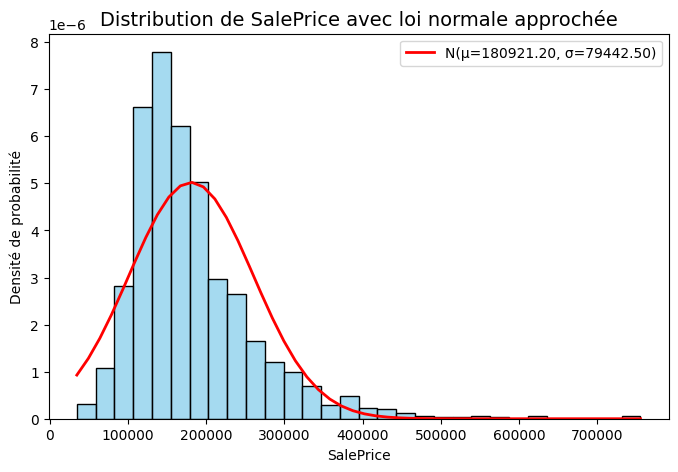

In [107]:
plot_hist(df['SalePrice'])

Vous devez obtenir une distribution des valeurs de `SalePrice` proches d'une distribution normale mais légèrement asymétrique. On peut alors appliquer une transformation logarithmique pour approcher d'une distribution normale symétrique.

**Effectuer cette transformation sur notre ensemble de données.**

In [108]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = np.log1p(df[numeric_cols])

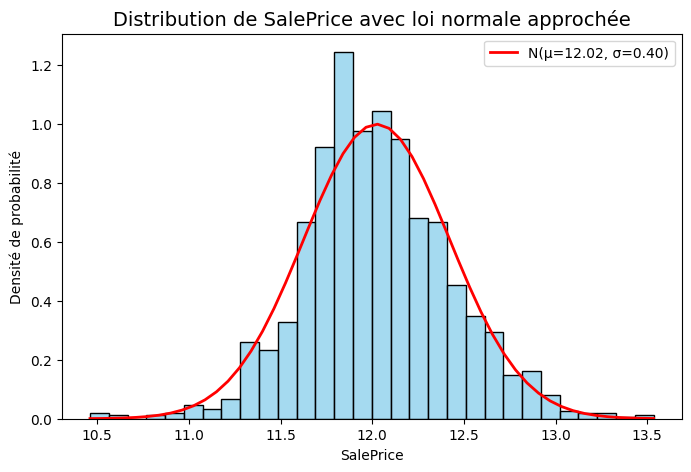

In [109]:
plot_hist(df['SalePrice'])

In [110]:
# Cette copie va servir plus tard pour la question 6 (IQR)
df_order1 = df.copy()

<a id="detection-des-valeurs-aberrantes"></a>
### 2.3 Détection des valeurs aberrantes

En pratique, la méthode de détection d'une valeur aberrante nécessite de se poser les questions suivantes:
- Quelles valeurs seraient incohérentes pour chaque colonne ?
- Quelles valeurs peuvent être problématiques pour l'utilisation de ces données ? Exemple: pour une régression linéaire, on préfère avoir des valeurs distribuées suivant une loi normale.

Avec ces éléments, on peut:
- Fixer des seuils de tolérance pour les valeurs aberrantes
- Utiliser des algorithmes de détection de valeurs aberrantes (ex: clustering, IRQ, [QTest](https://plotly.com/python/v3/outlier-test/), ...)

A noter que suivant les méthodes, les valeurs détectées comme aberrantes peuvent être différentes.

La méthode IRQ fait l'objet d'une question, en fin de ce notebook.

### 2.3.1 Question 7 (10 points)

Ici comme nous allons réaliser une régression linéaire, nous allons visuellement voir si certains points s'écartent largement de la droite de régression.

On sait que l'on veut effectuer une régression linéaire pour prédire `SalePrice`. On peut donc visualiser les valeurs de chaque attribut en fonction de `SalePrice` pour détecter la présence de valeurs aberrantes.

**Implémenter la fonction `plot_line`. Elle doit permettre de visualiser la relation entre un attribut donné et `SalePrice`.**

In [111]:
def plot_line(attr):
    """
    Affiche la relation entre attr et SalePrice

    :param attr: attribut à comparer à SalePrice
    """
    plt.figure(figsize=(8,5))
    print(attr)
    if pd.api.types.is_numeric_dtype(df[attr]):
        sns.regplot(
            x=attr, 
            y="SalePrice", 
            data=df, 
            scatter_kws={'alpha':0.6}, 
            line_kws={'color':'red'}
        )
        plt.title(f"Relation entre {attr} et SalePrice")
        
    else:
        sns.boxplot(
            x=attr, 
            y="SalePrice", 
            data=df
        )
        plt.title(f"Distribution de SalePrice selon {attr}")
        plt.xticks(rotation=45)
    
    plt.xlabel(attr)
    plt.ylabel("SalePrice")
    plt.show()

**Afficher les relations de tous les attributs avec `SalePrice`. Peut-on y déceler des valeurs aberrantes ?**

MSSubClass


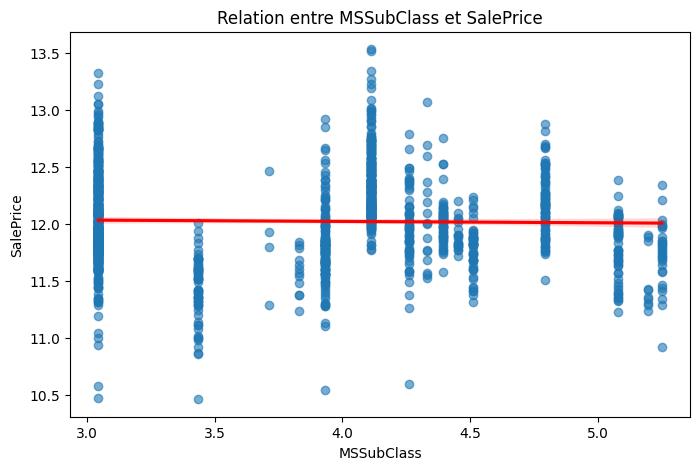

MSZoning


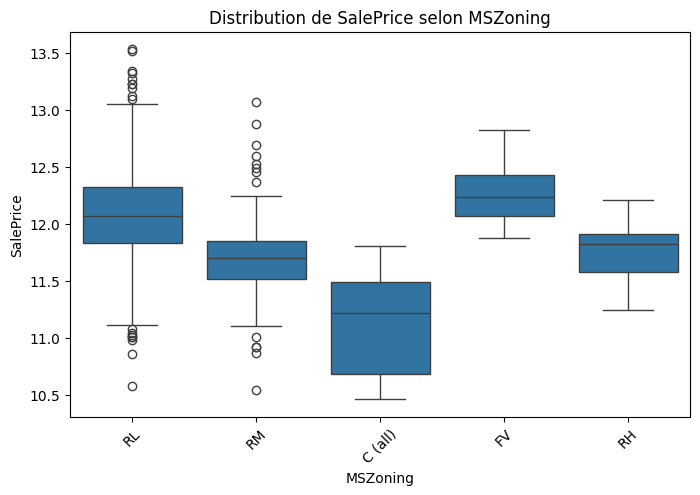

LotArea


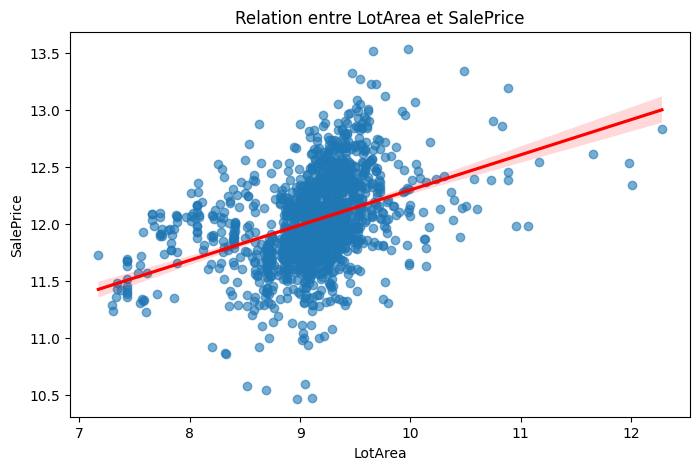

LotConfig


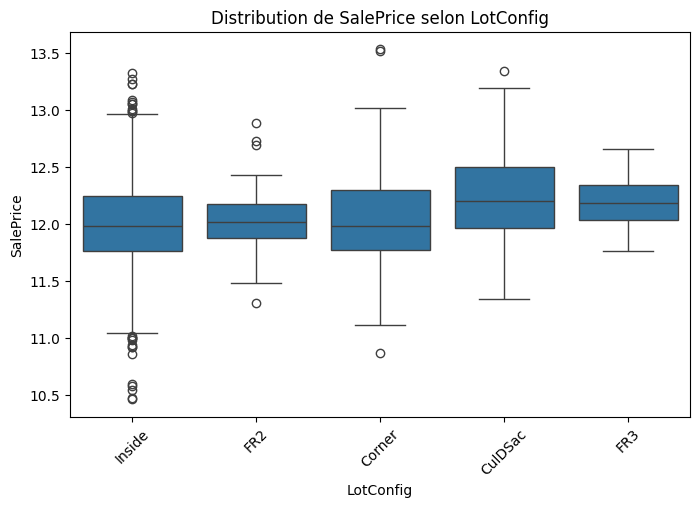

BldgType


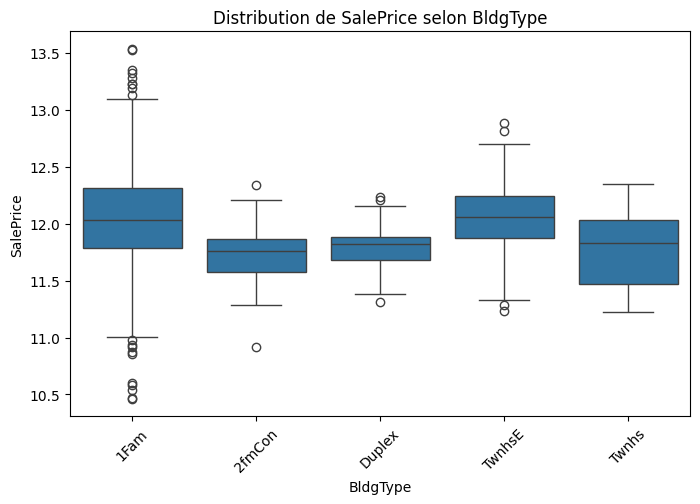

OverallCond


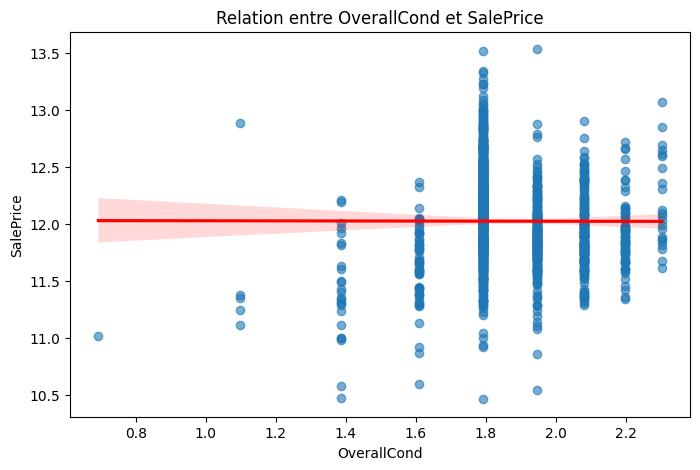

YearBuilt


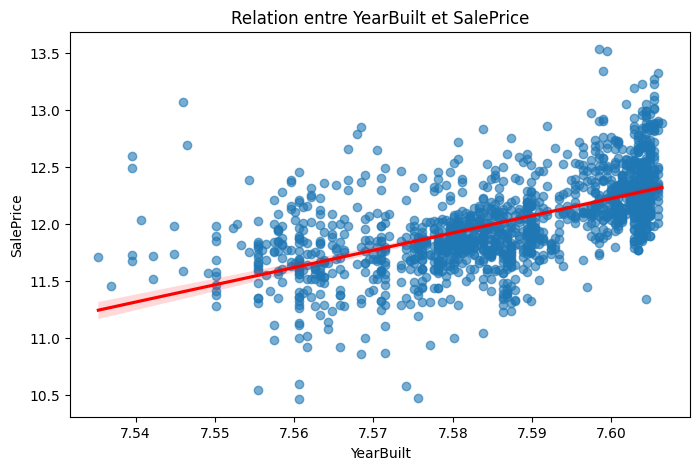

YearRemodAdd


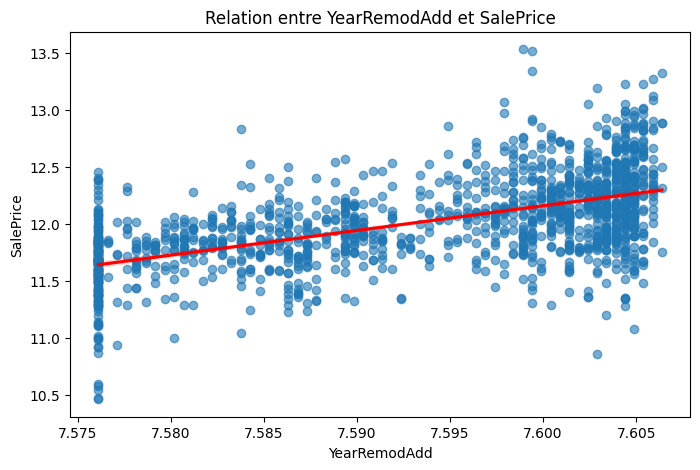

Exterior1st


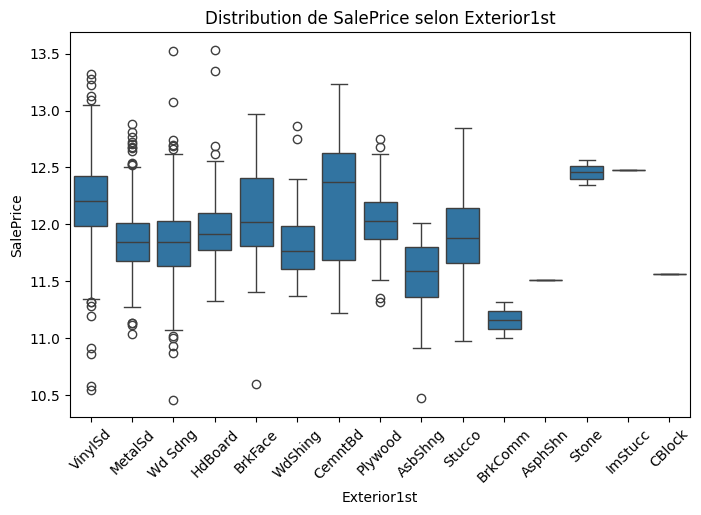

BsmtFinSF2


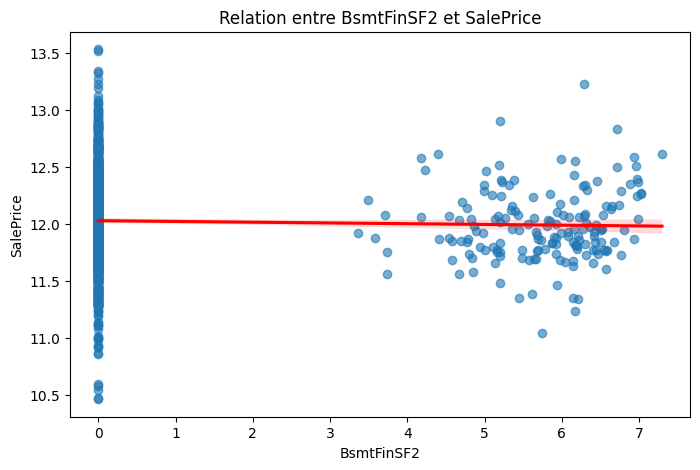

TotalBsmtSF


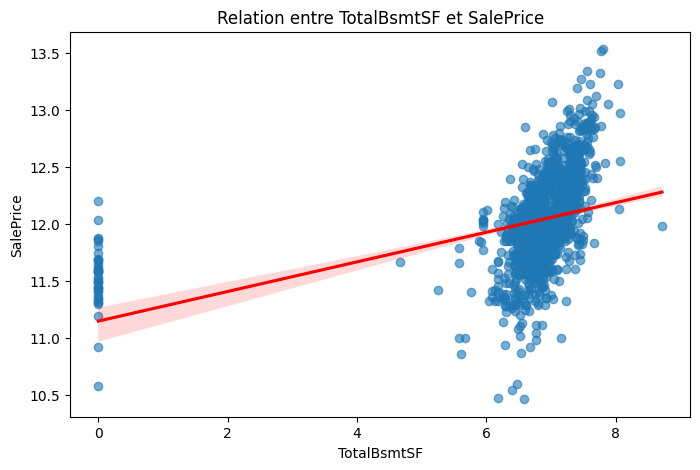

In [112]:
#TODO
for column in df.columns:
    if(column != 'SalePrice'):
        plot_line(column)

**À ce stade, il s'agit uniquement de détecter la présence éventuelle de valeurs aberrantes dans les données.**
**Aucune action de traitement ou de remplacement n'est demandée pour le moment**

## 3. Transformation des données (10 points)

### 3.1 Encodage des attributs de type `object`

Les attributs de type `object` étant catégoriques (voire partie 1), on peut effectuer un `one hot encoding` de ces attributs. `Pandas` permet d'effectuer cela avec la fonction `get_dummies()`. Cela nous permettra d'obtenir un dataset contenant uniquement des attributs de type `int` ou `float`.


#### 3.1.1 Question 8 (5 points)

**Encodez les attributs de type `object` avec un `one hot encoding`**

In [113]:
#TODO
df = pd.get_dummies(df, drop_first=True, dtype=float)
print(df.head())

   MSSubClass   LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0    4.110874  9.042040     1.791759   7.602900      7.602900         0.0   
1    3.044522  9.169623     2.197225   7.589336      7.589336         0.0   
2    4.110874  9.328212     1.791759   7.601902      7.602401         0.0   
3    4.262680  9.164401     1.791759   7.557995      7.586296         0.0   
4    4.110874  9.565284     1.791759   7.601402      7.601402         0.0   

   TotalBsmtSF  SalePrice  MSZoning_FV  MSZoning_RH  ...  Exterior1st_CemntBd  \
0     6.753438  12.247699          0.0          0.0  ...                  0.0   
1     7.141245  12.109016          0.0          0.0  ...                  0.0   
2     6.825460  12.317171          0.0          0.0  ...                  0.0   
3     6.629363  11.849405          0.0          0.0  ...                  0.0   
4     7.044033  12.429220          0.0          0.0  ...                  0.0   

   Exterior1st_HdBoard  Exterior1st_ImStucc  Exter

### 3.2 Normalisation des données

Pour faciliter l'entraînement du modèle, on peut normaliser les données. `sklearn` permet d'effectuer cela avec les fonctions suivantes :

*   `StandardScaler()` normalise les données en soustrayant la moyenne et en divisant par l'écart-type
*   `MinMaxScaler()` normalise les données en les ramenant entre 0 et 1.

Dans la suite de ce TP, nous utiliserons la fonction `StandardScaler()`.

In [114]:
# A utiliser dans la partie 5.2
mu_sale_price = df["SalePrice"].mean()
sigma_sale_price = df["SalePrice"].std()

#### 3.2.1 Question 9 (5 points)

**Implémenter la fonction `normalize`. Elle doit réaliser la normalisation des données.**

In [115]:
def normalize(dataset):
    """
    Normalise les données du dataset.

    :param dataset: ensemble des données
    :return:
      dataset traitée
    """
    scaler = preprocessing.StandardScaler()
    scaled_dataset = scaler.fit_transform(dataset)
    return pd.DataFrame(scaled_dataset, columns=dataset.columns, index=dataset.index)

In [116]:
df = normalize(df)

## 4. Sélection des attributs corrélées (15 points)

### 4.1 Suppression des attributs corrélées

Pour améliorer la qualité de la prédiction, nous devons prendre en compte la corrélation entre attributs. L'objectif est donc de supprimer les attributs les plus fortement corrélées entre eux.

Pour ce faire, vous disposez des fonctions suivantes

* `corr()` de `Pandas` qui calcule la matrice de corrélation
* `heatmap()` de `seaborn` qui permet de visualiser la matrice de corrélation


#### 4.1.1 Question 10 (10 points)

**Implémenter la fonction `display_corr_matrix`. Elle doit permettre d'afficher la matrice de corrélation entre les différents attributs de nos données après normalisation des données.**

In [117]:
def display_corr_matrix(dataset):
    """
    Créer et affiche la matrice de corrélation des attributs liés au dataset.

    :param dataset: ensemble des données
    """
    corr_matrix = dataset.corr()
    print(corr_matrix)
    plt.figure(figsize=(10, 8)) 
    sns.heatmap(
        corr_matrix,
        cmap="coolwarm",   
        fmt=".2f",        
        linewidths=1 
    )
    plt.title("Matrice de corrélation", fontsize=16, pad=20)
    plt.show()

                     MSSubClass   LotArea  OverallCond  YearBuilt  \
MSSubClass             1.000000 -0.425002    -0.041236  -0.001438   
LotArea               -0.425002  1.000000    -0.025768   0.041049   
OverallCond           -0.041236 -0.025768     1.000000  -0.305919   
YearBuilt             -0.001438  0.041049    -0.305919   1.000000   
YearRemodAdd           0.050011  0.047402     0.062210   0.608625   
BsmtFinSF2            -0.100805  0.073226     0.080059  -0.052296   
TotalBsmtSF           -0.093272  0.099607     0.000282   0.209278   
SalePrice             -0.020279  0.399923    -0.001794   0.584443   
MSZoning_FV            0.136574 -0.195665    -0.096180   0.240418   
MSZoning_RH            0.063236 -0.041178    -0.006534  -0.058574   
MSZoning_RL           -0.318635  0.471779    -0.051999   0.289670   
MSZoning_RM            0.265787 -0.408175     0.134476  -0.416658   
LotConfig_CulDSac     -0.039103  0.193056    -0.001307   0.110581   
LotConfig_FR2          0.041616 -0

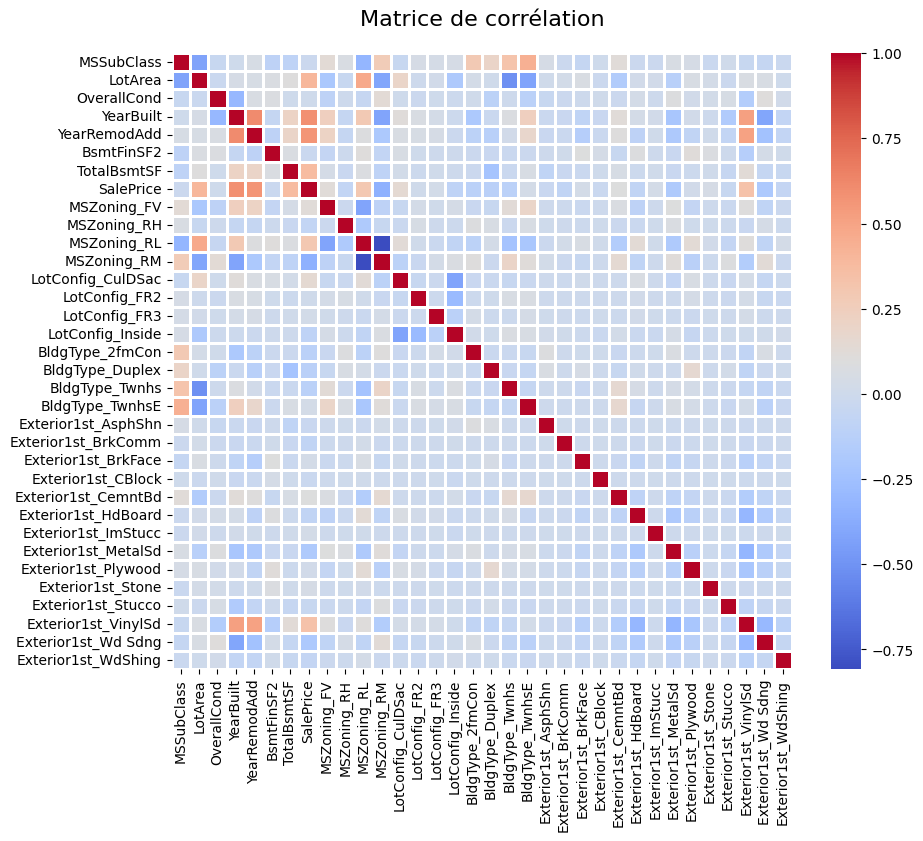

In [118]:
display_corr_matrix(df)

#### 4.1.2 Question 11 (5 points)

On peut alors choisir de supprimer les attributs qui sont fortement corrélées entre eux en définissant un seuil. Fixons ce seuil à 0.7.

**Quels sont les attributs fortement correlés selon le critère ci-dessus ? Supprimez ces attributs et affichez la nouvelle matrice de corrélation.**

In [121]:
#TODO
corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
column = [column for column in upper.columns if any(upper[column] > 0.7)]
print("Column to drop: ", column)

df.drop(columns=column)

new_corr_matrix = df.corr()
print(new_corr_matrix)


Column to drop:  ['MSZoning_RM']
                     MSSubClass   LotArea  OverallCond  YearBuilt  \
MSSubClass             1.000000 -0.425002    -0.041236  -0.001438   
LotArea               -0.425002  1.000000    -0.025768   0.041049   
OverallCond           -0.041236 -0.025768     1.000000  -0.305919   
YearBuilt             -0.001438  0.041049    -0.305919   1.000000   
YearRemodAdd           0.050011  0.047402     0.062210   0.608625   
BsmtFinSF2            -0.100805  0.073226     0.080059  -0.052296   
TotalBsmtSF           -0.093272  0.099607     0.000282   0.209278   
SalePrice             -0.020279  0.399923    -0.001794   0.584443   
MSZoning_FV            0.136574 -0.195665    -0.096180   0.240418   
MSZoning_RH            0.063236 -0.041178    -0.006534  -0.058574   
MSZoning_RL           -0.318635  0.471779    -0.051999   0.289670   
MSZoning_RM            0.265787 -0.408175     0.134476  -0.416658   
LotConfig_CulDSac     -0.039103  0.193056    -0.001307   0.110581   
L

## 5. Entrainement d'un modèle de régression linéaire (30 points)

### 5.1 Rappel du concept

La régression linéaire consiste à trouver une fonction affine qui minimise la somme des carrés des erreurs. La fonction affine est définie par la formule suivante :
$$ f(x) = \beta_0 + \beta_1^T x $$
Nous tentons de trouver les paramètres $\beta_0$ et $\beta_1$ qui minimisent $\sum_{i=1}^n (f(x_i) - y_i)^2=||y-X\beta||^2$ où $X$ est la matrice des données fournies au modèle et $y$ le vecteur des `SalePrice`.

On veut trouver le minimum de cette fonction. On va utiliser `RidgeRegression` de `sklearn` pour trouver les paramètres $\beta_0$ et $\beta_1$. Ce module utilise la méthode des moindres carrés (`numpy.linalg.lstsq`) pour trouver les paramètres $\beta_0$ et $\beta_1$.

### 5.2 Application

#### 5.2.1 Question 12 (5 points)

Après avoir effectué le prétraitement, on peut commencer par séparer les données en un ensemble d'entraînement et un ensemble de test. Pour cela, les 1460 premières lignes contiennent les données d'entrainement. On peut ainsi séparer les données en deux ensembles.

**Compléter la structure suivante afin de diviser les données en deux sous-ensembles.**

In [ ]:
#TODO
data_train = {"x": df.iloc[:1460].drop(columns=["SalePrice"]), "y": df.iloc[:1460]["SalePrice"], "df": df.iloc[:1460]}
data_pred = {"x": df.iloc[1460:].drop(columns=["SalePrice"]), "df": df.iloc[1460:]}


{'x':       MSSubClass   LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
1460   -1.121933  0.526551     0.455953  -0.335038     -1.116193    2.284370   
1461   -1.121933  0.930145     0.455953  -0.434319     -1.261463   -0.362988   
1462    0.418014  0.868914    -0.442594   0.844637      0.657430   -0.362988   
1463    0.418014  0.226360     0.455953   0.877102      0.657430   -0.362988   
1464    1.407121 -1.131554    -0.442594   0.682071      0.372057   -0.362988   
...          ...       ...          ...        ...           ...         ...   
2914    1.819584 -3.000574     1.234309  -0.038102     -0.681712   -0.362988   
2915    1.819584 -3.043725    -0.442594  -0.038102     -0.681712   -0.362988   
2916   -1.121933  1.595009     1.234309  -0.368115      0.562401   -0.362988   
2917    0.914034  0.315634    -0.442594   0.682071      0.372057   -0.362988   
2918    0.418014  0.155875    -0.442594   0.714617      0.467277   -0.362988   

      TotalBsmtSF  MSZoning_FV  M

#### 5.2.2 Question 13 (7.5 points)

Une fois cette séparation faite, on peut utiliser `RidgeRegression` pour effectuer la régression linéaire avec pénalisation de la norme L2.

**Compléter la fonction `ridge_regression`. Elle doit implémenter l'ensemble de la régression.**

*Pour cette question, vous devez retourner les coefficients de la regression linéaire. De plus, cette fonction doit modifier le paramètre `data_pred` en y ajoutant les valeurs prédites.*

**Remarques**:
- La fonction doit retourner un dictionnaire dont les clés sont les noms des attributs et les valeurs, les coefficients correspondants.
- Dans `data_pred`, ajoutez deux colonnes : une première contenant les prédictions (sortie du modèle), et une deuxième avec les prédictions remises à l’échelle originale des prix, en inversant la standardisation et la transformation logarithmique.

In [ ]:
def ridge_regression(data_train, data_pred):
    """
    Réaliser la prédiction selon la régression de Rigde.

    :param data_train: données d'entrainement
    :param data_pred: données de prédiction
    
    :return:
      coefficients de la régression
    """
    data_pred["y"] = #TODO
    pass

In [ ]:
 reg = ridge_regression(data_train, data_pred)
 data_pred["y"]

#### 5.2.3 Question 14 (5 points)

**À l’aide d’un histogramme, comparez la distribution des prix prédits à celle des données d’entraînement, en vous assurant que les deux sont représentées à l’échelle originale des prix (c’est-à-dire sans transformation logarithmique ni standardisation). Commentez brièvement.**

In [ ]:
#TODO

### 5.3. Sélection des attributs importants
#### 5.3.1 Question 15 (5 points)

Une fois la prédiction obtenue, on peut maintenant mesurer l'importance de chaque attribut dans la prédicition en traçant les coefficients de la régression linéaire.

**Quels sont les dix attributs ayant le plus d'impact dans la prédiction ?**


In [ ]:
#TODO

#### 5.3.2 Question 16 (7.5 points)

Cette dernière méthode n'est pas nécessairement une bonne mesure de l'importance d'un attribut. On peut utiliser la méthode SHAP (SHapley Additive exPlanations) pour effectuer la sélection des attributs.

**Les dix attributs ayant le plus d'impact dans la prédiction pour cette mesure sont-ils les mêmes que ceux de la question précédente ? Donnez une interprétation comparative de ces deux résultats**


In [ ]:
#TODO

## 6. Méthode des écarts interquartiles ou IRQ (10 points)

On peut également détecter les valeurs aberrantes en affichant un boxplot de chaque colonne. On considère les valeurs comme aberrantes si elles sont situées en dehors de l'intervalle [Q1 - α * IQR, Q3 + α * IQR] où
* Q1 et Q3 sont les quantiles 25% et 75%,
* IQR l'intervalle interquartile (Q3 - Q1)
* α le facteur d'ajustement.

Pour cette question, on exclut `SalePrice` car les seules valeurs manquantes de cet attribut sont celles du dataset de test.

**Important :** Pour cette question, utilisez le jeux de données `df_order1` copié vers la fin de la section 2.

### 6.1 Question 17 (5 points)

Testez plusieurs valeurs du facteur d'ajustement α dans l'intervalle [1.5, 5] avec un pas de 0.5.
Pour chaque valeur de α :
- Calculez les bornes de détection des valeurs aberrantes (fences) pour chaque attribut numérique.
- Déterminez le nombre de valeurs aberrantes détectées pour chaque attribut.
- Affichez les résultats dans un `DataFrame`, où les lignes correspondent aux différentes valeurs de α et les colonnes correspondent aux attributs numériques.

**Remarque :** Vous pouvez utiliser la fonction `percentile` de `numpy` pour calculer les quantiles.

In [ ]:
#TODO

Visualisez les résultats dans une seule figure:
- L’axe X représente les valeurs de α.
- L’axe Y représente le nombre de valeurs aberrantes.
- Chaque courbe correspond à un attribut numérique, illustrant l’évolution du nombre de valeurs aberrantes en fonction de α.

Quelle valeur de α vous semble le mieux adaptée? Justifiez votre réponse.

In [ ]:
#TODO

### 6.2 Question 18 (5 points)

**On  fixe le facteur d'ajustement α à `3` pour tous les attributs.**

Pour chaque attribut numérique, tracez un boxplot. Ajoutez également deux lignes horizontales représentant les bornes inférieure et supérieure de l’intervalle [Q1 - α * IQR, Q3 + α * IQR].

In [ ]:
#TODO

Pour chaque attribut numérique (à l'exception de `BsmtFinSF2`), remplacez les valeurs aberrantes détectées avec α=3 par la `valeur médiane` de la colonne. Pourquoi ce remplacement n’est pas approprié pour l’attribut `BsmtFinSF2` ?

In [ ]:
#TODO